Automatically created module for IPython interactive environment


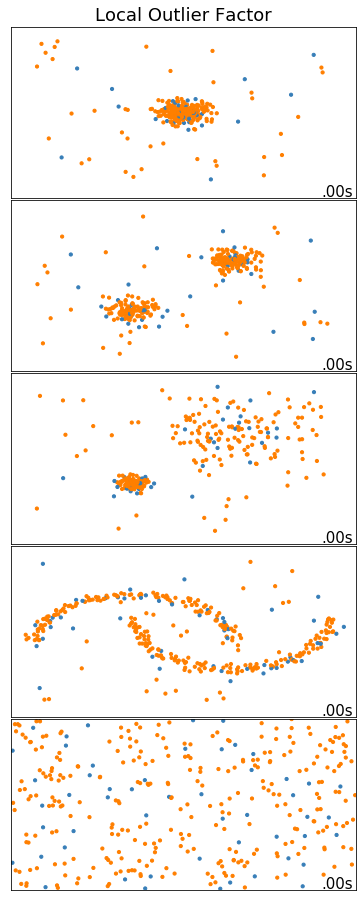

In [3]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Albert Thomas <albert.thomas@telecom-paristech.fr>
# License: BSD 3 clause

import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = 300 # number of samples
outliers_fraction = 0.15 # proportion of outliers
n_outliers = int(outliers_fraction * n_samples) # number of outliers
n_inliers = n_samples - n_outliers # number of inliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    
    
    #("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    #("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
    #                                 gamma=0.1)),
    #("Isolation Forest", IsolationForest(contamination=outliers_fraction,
    #                                     random_state=42)),
    
    
    ("Local Outlier Factor", LocalOutlierFactor( 
        n_neighbors=1, contamination=outliers_fraction))]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2) # random_state: Determines random number generation for dataset creation, n_samples: the total number of points equally divided among clusters, n_features: The number of features for each sample.
datasets = [
    
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, # centers: The number of centers to generate, or the fixed center locations, cluster_std: The standard deviation of the clusters.
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] - # Make two interleaving half circles, noise: Standard deviation of Gaussian noise added to the data.
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)] # RandomState and Generator expose a number of methods for generating random numbers drawn from a variety of probability distributions.

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), # meshgrid: Return coordinate matrices from coordinate vectors.
                     np.linspace(-7, 7, 150)) # linspace: Return evenly spaced numbers over a specified interval.



plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5)) # Create a new figure, or activate an existing figure, 
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01) # Adjust the subplot layout parameters.

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0) #Join a sequence of arrays along an existing axis.



    for name, algorithm in anomaly_algorithms:
        t0 = time.time() # Return the time in seconds since the epoch as a floating point number
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num) # Add a subplot to the current figure.
        if i_dataset == 0:
            plt.title(name, size=18) # Set a title for the axes.

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) # np.c_: Translates slice objects to concatenation along the second axis.
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black') # contour draw contour lines, levels: Determines the number and positions of the contour lines / regions.

        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2]) #A scatter plot of y vs. x with varying marker size and/or color.

        plt.xlim(-7, 7) # Get or set the x limits of the current axes.
        plt.ylim(-7, 7)
        plt.xticks(()) # Get or set the current tick locations and labels of the x-axis.
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), # Add text to the axes.
                 transform=plt.gca().transAxes, size=15, # Get the current axes, creating one if necessary. 
                 horizontalalignment='right') 
        plot_num += 1

plt.show() # Display all open figures.

In [ ]:
# Obsevation: 
# As we increase the number of neighbors, the number of outliers in the graph increase.
# As we decrease the number of neighbors, the number of outliers in the graph decrease.
# However, the number of outliers is fixed 
# the reason causing the above observation is because the change in the number of neighbors
# make the samples easier out of bound (LOF > 1) or in bound (LOF <= 1).
 